In [1]:
import numpy as np
import matplotlib.pyplot as plt
import  keras
import os
from keras.models import Sequential , Model
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Input    #conv2d for image , conv3d for videos
import cv2
from sklearn.model_selection import train_test_split 

In [2]:
dirname = r'C:\Users\Alo\Desktop\ProjectML2\BrainTumor\Training'         # https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset?resource=download
categories = [ 'no_tumor' , 'tumor']
data_set = []
for category in categories:
    label = categories.index(category)
    folder = os.path.join(dirname,category)
    for image in os.listdir(folder):
        img_name = os.path.join(folder,image)
        img_nparray = cv2.imread(img_name)
        img_nparray = cv2.resize(img_nparray, (200,200))
        data_set.append([img_nparray,label])

In [3]:
x = []
y = []
for data in data_set:
    x.append(data[0])
    y.append(data[1])

In [4]:
x = np.array(x)
y = np.array(y)

In [5]:
x = x/255.0

In [6]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , shuffle = True)

In [7]:
model = Sequential([
    Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),    # 64 layers (feature detector) , feature detector 3x3 grid and after that avtivation with relu
    MaxPooling2D((2,2)),     #filter compate in 2x2 blocks  
    Conv2D(64,(3,3),activation = 'relu'),    # 64 layers (feature detector) , feature detector 
    MaxPooling2D((2,2)) ,
    Conv2D(64,(3,3),activation = 'relu'),    # 64 layers (feature detector) , feature detector 
    MaxPooling2D((2,2)) , 
    Flatten(),               # convert to 1d array  ( to flatten out the image )
    Dense(32,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [8]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
model.fit(x_train,y_train,epochs = 20,batch_size = 10)

Epoch 1/20
119/119 [==============================] - 93s 749ms/step - loss: 0.4005 - accuracy: 0.8067
Epoch 2/20
119/119 [==============================] - 92s 773ms/step - loss: 0.2303 - accuracy: 0.9101
Epoch 3/20
119/119 [==============================] - 99s 834ms/step - loss: 0.1745 - accuracy: 0.9328
Epoch 4/20
119/119 [==============================] - 88s 734ms/step - loss: 0.1256 - accuracy: 0.9538
Epoch 5/20
119/119 [==============================] - 75s 631ms/step - loss: 0.0861 - accuracy: 0.9697
Epoch 6/20
119/119 [==============================] - 77s 649ms/step - loss: 0.0370 - accuracy: 0.9882
Epoch 7/20
119/119 [==============================] - 72s 602ms/step - loss: 0.0319 - accuracy: 0.9899
Epoch 8/20
119/119 [==============================] - 74s 619ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 9/20
119/119 [==============================] - 74s 622ms/step - loss: 0.0410 - accuracy: 0.9832
Epoch 10/20
119/119 [==============================] - 88s 745ms/step - l

In [10]:
# model = keras.models.load_model('C:/Users/Alo/Desktop/ProjectML2/model_bt4.keras')

In [11]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 10s 495ms/step - loss: 0.3745 - accuracy: 0.9589


[0.37447109818458557, 0.9589040875434875]

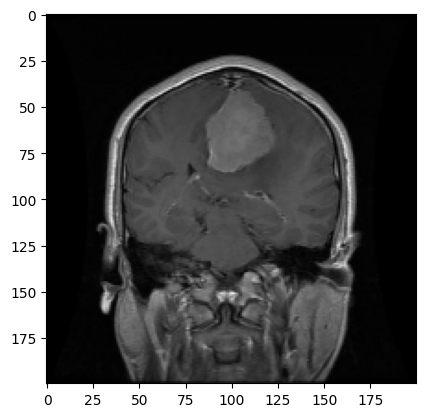

1/1 [==============================] - 0s 348ms/step
tumor


In [12]:
import random 
idx = random.randint(0,len(x_test))
plt.imshow(x_test[idx ])
plt.show()
y_pred = model.predict(x_test[idx,:].reshape(1,200,200,3))
if y_pred > 0.5:
    y_pred = 'tumor'
else:
    y_pred = 'No tumor'
print(y_pred)

In [13]:
y_test[idx]

1

In [14]:
model.save('C:/Users/Alo/Desktop/MiniProject/model.keras')